<a href="https://colab.research.google.com/github/Dhanessss20/PCVK_Ganjil_2024/blob/main/PCVK_Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Dhaneswara Haryo Satriagung** <br>
**NIM : 2241720037** <br>
**Kelas : TI-3B** <br>

#MODUL 10 – Thresholding, Segmentasi Sederhana

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. <br>

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# 1. Manual BINARY Threshold
def manual_binary(img, thresh):
    binary_img = np.zeros_like(img)
    binary_img[img > thresh] = 255
    return binary_img

# 2. Manual BINARY_INV Threshold
def manual_binary_inv(img, thresh):
    binary_inv_img = np.zeros_like(img)
    binary_inv_img[img <= thresh] = 255
    return binary_inv_img

# 3. Manual TRUNC Threshold
def manual_trunc(img, thresh):
    trunc_img = np.copy(img)
    trunc_img[img > thresh] = thresh
    return trunc_img

# 4. Manual TOZERO Threshold
def manual_tozero(img, thresh):
    tozero_img = np.copy(img)
    tozero_img[img <= thresh] = 0
    return tozero_img

# 5. Manual TOZERO_INV Threshold
def manual_tozero_inv(img, thresh):
    tozero_inv_img = np.copy(img)
    tozero_inv_img[img > thresh] = 0
    return tozero_inv_img

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.


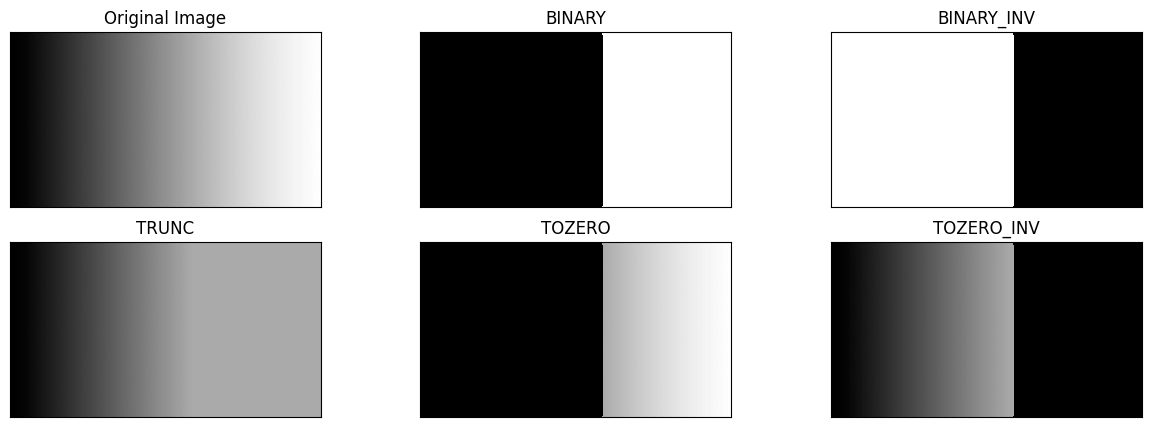

In [ ]:
filename = ('/content/drive/MyDrive/gradient.jpg')
img = cv2.imread(filename)
thresh = 170

thresh1 = manual_binary(img, thresh)
thresh2 = manual_binary_inv(img, thresh)
thresh3 = manual_trunc(img, thresh)
thresh4 = manual_tozero(img, thresh)
thresh5 = manual_tozero_inv(img, thresh)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


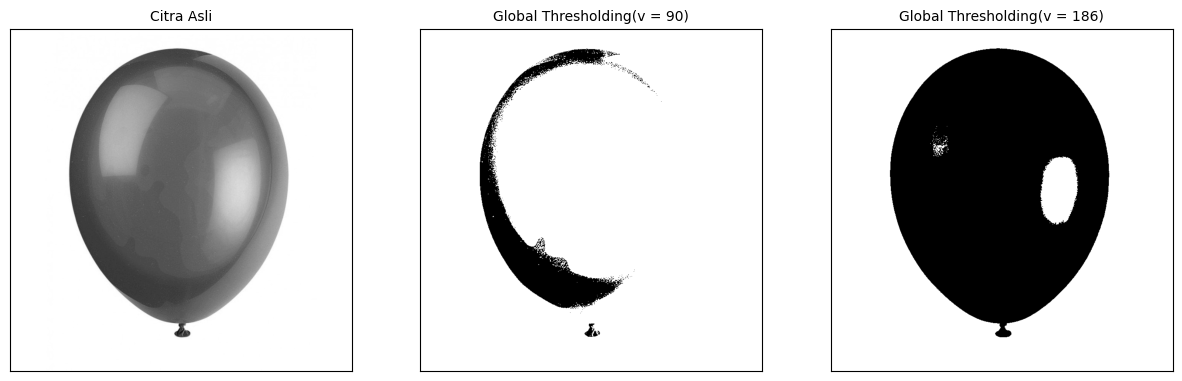

In [ ]:
def otsu_thresholding(image, threshold):
  thresholded_image = (image > threshold) * 255

  return thresholded_image

img = cv2.imread('/content/drive/MyDrive/balloon.jpg', 0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1), plt.imshow(img, 'gray')
plt.title('Citra Asli', fontsize=10)
plt.xticks([]), plt.yticks([])

v = 90
thresholded_img = otsu_thresholding(img, v)

plt.subplot(1, 3, 2), plt.imshow(thresholded_img, 'gray')
plt.title('Global Thresholding(v = 90)', fontsize=10)
plt.xticks([]), plt.yticks([])

v = 186
thresholded_img = otsu_thresholding(img, v)

plt.subplot(1, 3, 3), plt.imshow(thresholded_img, 'gray')
plt.title('Global Thresholding(v = 186)', fontsize=10)
plt.xticks([]), plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk: <br>
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram. <br>
b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html <br>
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment). <br>

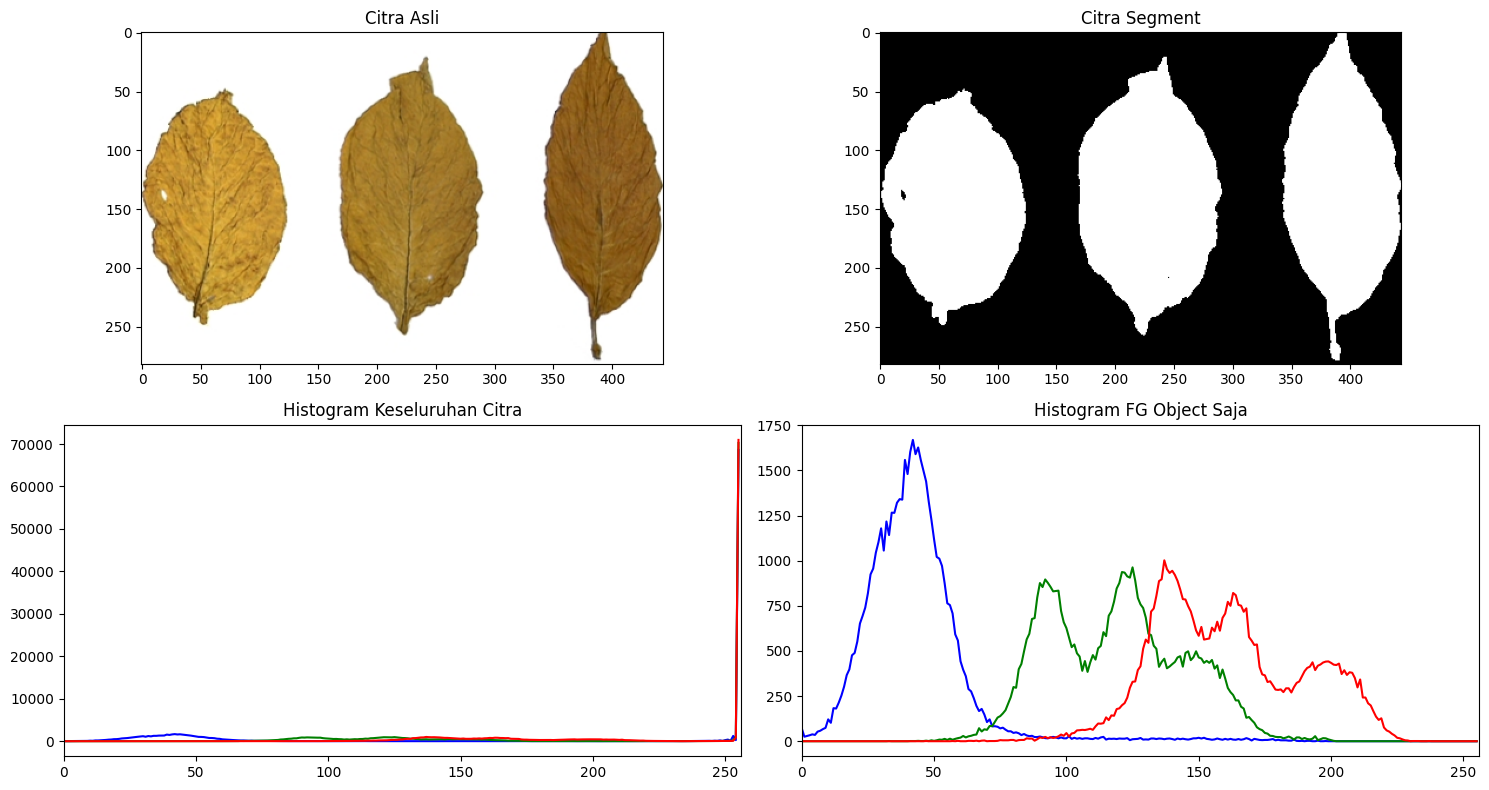

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/tobacco.jpg', cv2.IMREAD_COLOR)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, mask = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

# Invert the mask to select the foreground
mask_inv = cv2.bitwise_not(mask)

# Plot the original image and the segmented image side by side
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(mask_inv, cv2.COLOR_BGR2RGB))
plt.title('Citra Segment')

# Calculate histogram for the original image
colors = ('b', 'g', 'r')
plt.subplot(2, 2, 3)
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Histogram Keseluruhan Citra')

# Calculate histogram for the segmented (foreground) image using mask
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist_fg = cv2.calcHist([image], [i], mask_inv, [256], [0, 256])
    plt.plot(hist_fg, color=col)
    plt.xlim([0, 256])
plt.title('Histogram FG Object Saja')

# Display the plots
plt.tight_layout()
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

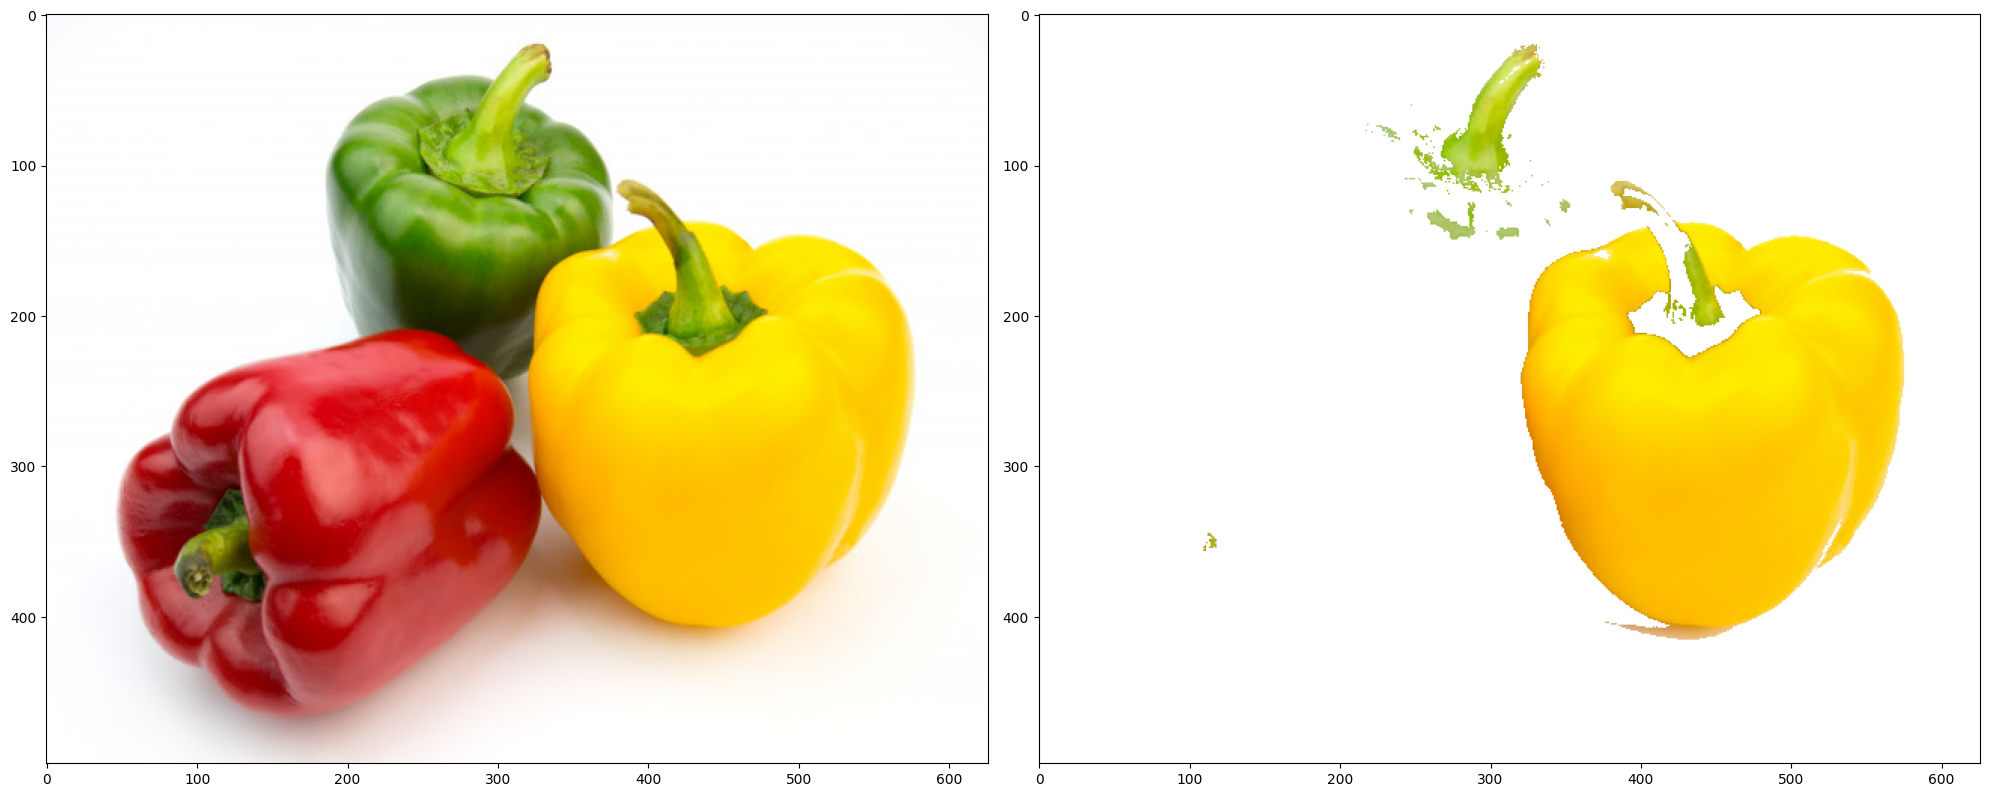

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/peppers.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib

# Reshape the image to a 2D array of pixels
pixel_values = img.reshape((-1, 3))
# Convert to float for K-Means
pixel_values = np.float32(pixel_values)

# Define the criteria and number of clusters (K)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (to get colors)
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Convert all pixels to the color of the centroid
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# Now we will create a mask for the yellow color (based on the closest centroid)
yellow_cluster = 0  # Placeholder for the yellow cluster index, to be found manually

# Find the index of the cluster closest to yellow [255, 255, 0] in RGB
yellow = np.array([255, 255, 0])  # Ideal yellow
distances = np.linalg.norm(centers - yellow, axis=1)
yellow_cluster = np.argmin(distances)  # Find the closest cluster

# Create a mask for the yellow cluster
mask = (labels == yellow_cluster)

# Create an output image where only the yellow cluster is shown, and the rest is white
output_image = np.full_like(img, 255)  # Initialize the image with white
output_image[mask.reshape(img.shape[:2])] = img[mask.reshape(img.shape[:2])]  # Set yellow areas

# Plot the results
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(output_image)

plt.tight_layout()
plt.show()

  **Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.** <br>

  Jawab:<br>

> a. Kesulitan Mengenali Warna Kuning dengan Tepat: K-Means clustering memecah warna-warna di gambar berdasarkan jarak antara nilai piksel dan centroid setiap cluster. Meskipun kita ingin menampilkan warna kuning, centroid yang dihitung oleh algoritma K-Means mungkin tidak tepat sesuai dengan definisi warna kuning yang kita tetapkan ([255, 255, 0]). Ini terjadi karena warna kuning yang muncul pada gambar asli mungkin sedikit berbeda dari nilai ideal yang kita tentukan (seperti sedikit lebih gelap, lebih terang, atau memiliki campuran warna lain).
Mengapa hal ini terjadi: Warna-warna pada gambar asli bisa sangat bervariasi karena pencahayaan, bayangan, dan gradasi warna. Warna kuning yang ada di gambar asli mungkin bukan warna kuning "murni", tetapi lebih berupa kombinasi berbagai tingkat intensitas merah dan hijau, sehingga sulit untuk mengidentifikasinya secara eksak menggunakan centroid yang dihasilkan oleh K-Means.

> b. Distribusi Warna yang Mendekati Kuning: Algoritma K-Means membagi gambar menjadi sejumlah cluster, tetapi tidak selalu menjamin bahwa setiap cluster secara eksklusif terdiri dari warna kuning. Cluster tersebut mungkin juga mencakup warna-warna lain yang mendekati kuning, seperti hijau muda, oranye, atau bahkan warna abu-abu terang. Ini membuat hasil masking kurang akurat dan beberapa bagian gambar yang bukan kuning juga bisa terdeteksi.
Mengapa hal ini terjadi: Karena K-Means mendasarkan cluster pada jarak warna dalam ruang RGB, warna-warna yang mendekati kuning bisa terklasifikasi ke dalam cluster yang sama dengan kuning. Warna seperti oranye atau hijau terang mungkin cukup dekat dengan warna kuning dalam ruang warna RGB, sehingga membuat algoritma sulit membedakannya.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.


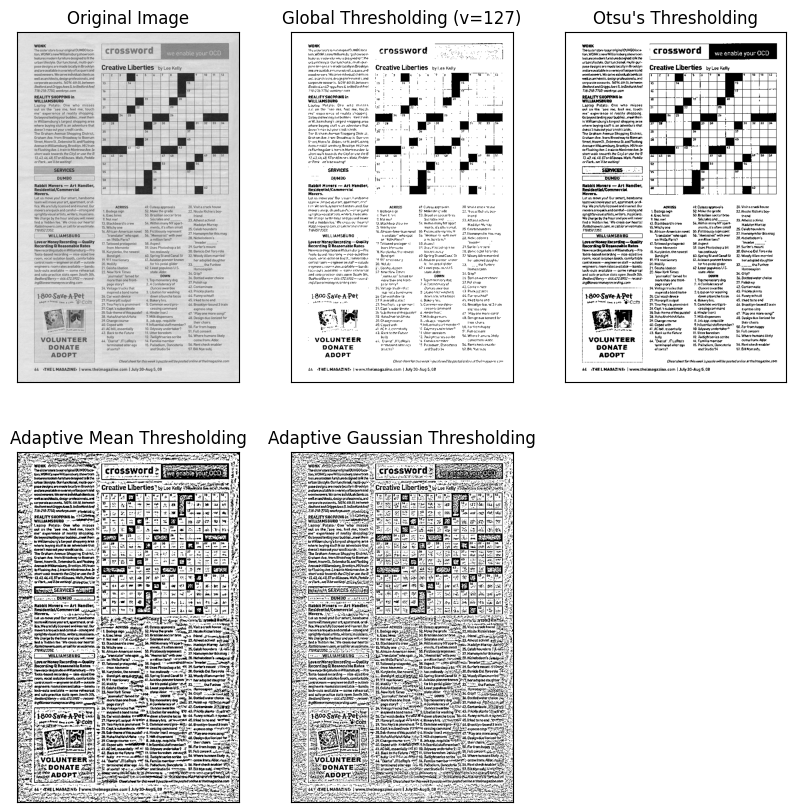

In [ ]:
# Load the image in grayscale
img = cv2.imread('/content/drive/MyDrive/crossword.jpg', cv2.IMREAD_GRAYSCALE)

thresh = 127

# Apply global thresholding
ret1, thresh_global = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

# Apply Otsu's thresholding
ret2, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply Adaptive Mean Thresholding
thresh_adaptive_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

# Apply Adaptive Gaussian Thresholding
thresh_adaptive_gaussian = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)

# Plot all thresholding results
titles = ['Original Image', 'Global Thresholding (v=127)',
          "Otsu's Thresholding", 'Adaptive Mean Thresholding',
          'Adaptive Gaussian Thresholding']
images = [img, thresh_global, thresh_otsu, thresh_adaptive_mean, thresh_adaptive_gaussian]

plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()